In [5]:
import pandas as pd
df = pd.read_csv('pokemon.csv', encoding='unicode_escape')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary']
df = df[types].drop(columns=drop_cols)
df.head()

,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,318,45,49,49,65,65,45
1,2,Ivysaur,405,60,62,63,80,80,60
2,3,Venusaur,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,4,Charmander,309,39,52,43,60,50,65


In [10]:
from sklearn.cluster import KMeans
import numpy as np

Kmeans = KMeans(n_clusters=3, random_state=3)
df['cluster'] = Kmeans.fit_predict(df[['Attack', 'Defense']])

centroids = Kmeans.cluster_centers_
cen_x = [i[0] for i in centroids]
cen_y = [i[1] for i in centroids]

df['cen_x'] = df.cluster.map({0: cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0: cen_y[0], 1:cen_y[1], 2:cen_y[2]})

colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0: colors[0], 1:colors[1], 2:colors[2]})

C:\Users\VIZECH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\VIZECH\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


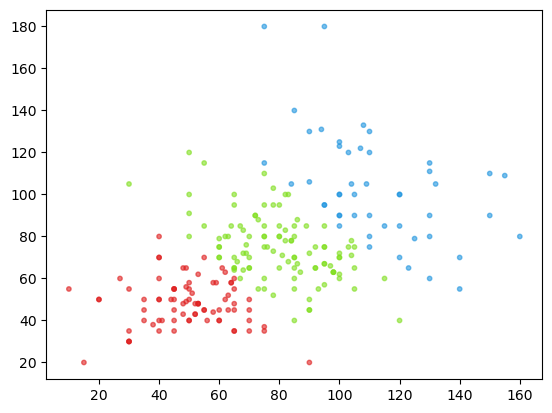

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df.Attack, df.Defense, c=df.c, alpha=0.6, s=10)

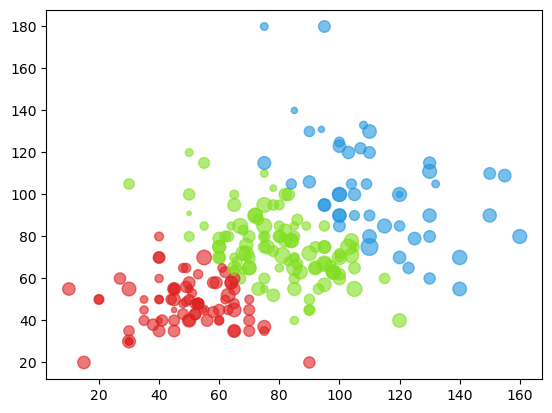

In [12]:
plt.scatter(df.Attack, df.Defense, c=df.c, s=df.Speed, alpha=0.6)

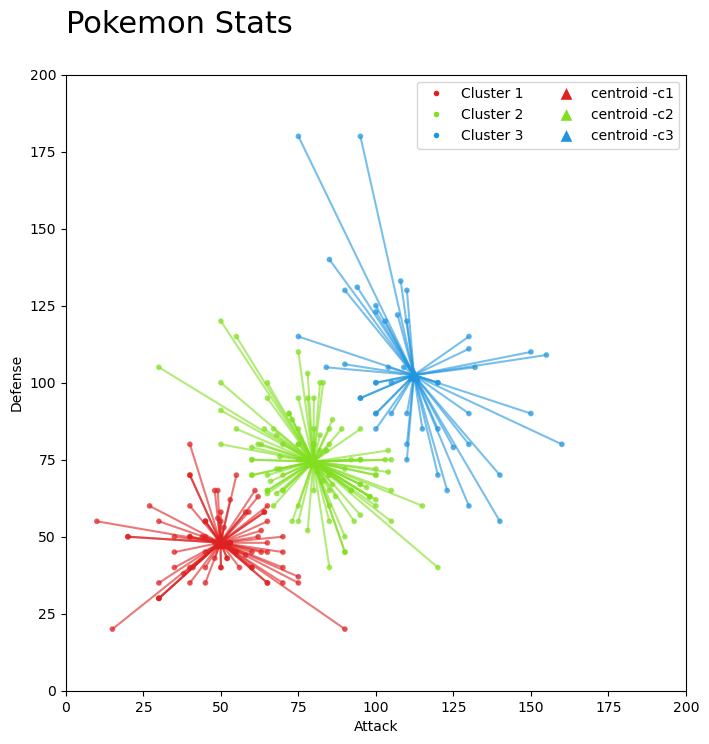

In [15]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Assuming df, cen_x, cen_y, and colors are already defined

fig, ax = plt.subplots(figsize=(8, 8))
plt.scatter(df.Attack, df.Defense, c=df.c, alpha=0.6, s=10)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)

for idx, val in df.iterrows():
    x = [val.Attack, val.cen_x]
    y = [val.Defense, val.cen_y]
    plt.plot(x, y, c=val.c, alpha=0.6)

# Centroid legend entries
cent_leg = [Line2D([0], [0], marker='^', color='w', label='centroid -c{}'.format(i+1),
                   markerfacecolor=mcolor, markersize=10) for i, mcolor in enumerate(colors)]

# Cluster legend entries
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Cluster {}'.format(i+1),
                          markerfacecolor=mcolor, markersize=5) for i, mcolor in enumerate(colors)]

# Combine centroid and cluster legends
legend_elements.extend(cent_leg)

# Plot legend
plt.legend(handles=legend_elements, loc='upper right', ncol=2)

# x and y limits
plt.xlim(0, 200)
plt.ylim(0, 200)

# Title and labels
plt.title('Pokemon Stats\n', loc='left', fontsize=22)
plt.xlabel('Attack')
plt.ylabel('Defense')

# Show plot
plt.show()